In [1]:
from aggregation_analytical_solution import Solution
from aggregation_read_data import Parse_agg_data
import matplotlib.pyplot as plt

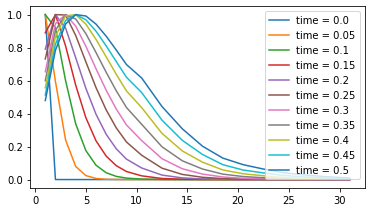

In [2]:
from aggregation_read_data import draw_aggregation_data
draw_aggregation_data('file_2020-02-08 18:45:18.txt',graph='plot',interactive=False)

In [3]:
filename = 'file_2020-01-19 16:02:11'+'.txt'
N, N0, dt, mass_min, mass_max, time, number, mass, weight, width = Parse_agg_data(filename)
B = 15 / N0

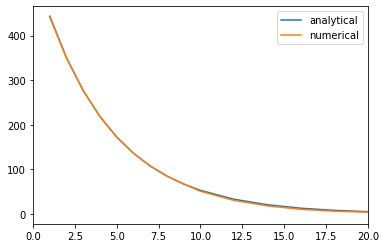

Time: 0.5


In [4]:
#timelist = list(time)
#index = timelist.index(0.05)
index = -1
plt.plot(mass_min,Solution(mass_min, time[-1], N0, B),label='analytical')
plt.plot(mass_min,number[index,:]/width, label='numerical')
plt.xlim([0,20])
#plt.ylim([1000,1500])
plt.legend()
plt.show()
print('Time:',time[-1])

In [5]:
# timelist = list(time)
# index = timelist.index(0.05)
# plt.plot(mass_min,number[index,:], label='numerical')
# #plt.plot(mass_min,Solution(mass_min, step*dt, N0, B),label='analytical')
# plt.xlim([0,20])
# plt.legend()
# plt.show()
# print('Time:',step*dt)

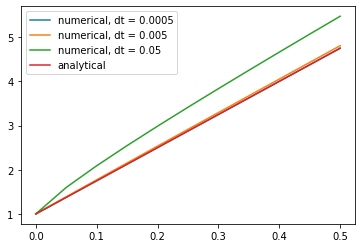

In [18]:
# average mass
import numpy as np
#print(mass[index,:].sum(axis=0)/number[index,:].sum())

masses = []
mass_range = range(1,int(mass_min[-1]))
for t in time:
    num = np.array(Solution(mass_range, t, N0, B))
    m = np.array(num * mass_range).sum() / num.sum()
    masses.append(m)

    
    
for file in ['file_2020-01-19 16:02:11','file_2020-01-19 16:07:18','file_2020-01-19 16:08:06']:
    filename = file + '.txt'
    N, N0, dt, mass_min, mass_max, time, number, mass, weight, width = Parse_agg_data(filename)
    plt.plot(time, mass.sum(axis=1) / number.sum(axis=1), label='numerical, dt = '+str(dt))
    
plt.plot(time, masses,label='analytical')

plt.legend()
plt.show()

# 0.05 is definetly too big for timestep

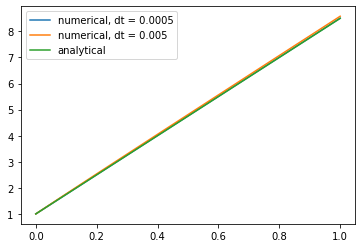

In [52]:
for file in ['file_2020-01-19 16:16:40','file_2020-01-19 16:16:28']:
    filename = file + '.txt'
    N, N0, dt, mass_min, mass_max, time, number, mass, weight, width = Parse_agg_data(filename)
    plt.plot(time, mass.sum(axis=1) / number.sum(axis=1), label='numerical, dt = '+str(dt))

masses = []
mass_range = range(1,int(mass_min[-1]))
for t in time:
    num = np.array(Solution(mass_range, t, N0, B))
    m = np.array(num * mass_range).sum() / num.sum()
    masses.append(m)

plt.plot(time, masses,label='analytical')
# plt.xlim([0.9,1])
# plt.ylim([7.5,9])
plt.legend()
plt.show()

# 0.005 vs 0.0005 is debatable, but probably 0.005 is the way to go
# it would be really nice to calculate difference vs time for each timestep

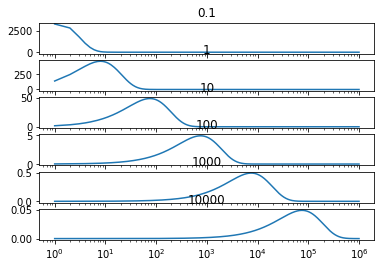

In [53]:
mass_range = range(1,1000000)

times = [0.1,1,10,100,1000,10000]
fig, a =  plt.subplots(len(times),1)
for i, t in enumerate(times):
    num = np.array(Solution(mass_range, t, N0, B))
    a[i].plot(mass_range, num*mass_range,label='analytical')
    a[i].set_xscale('log')
    a[i].set_title(str(t))
plt.show()
# mean mass (and therefore radius) changes linearly with time when kernel is constant
# what if kernel is not constant?

Check dependence on N